# Lecture 13:  Metropolis Algorithm 

**Overview:**
* Markov chain Monte Carlo.
* Metropolis algorithm.


**Next Lecture:**
* Ising model of ferromagnetism and Monte Carlo in stat mech.
---

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

We will generate a Gaussian probability distribution from an un-normalized Gaussian. This may not be so impressive, but remember, we start from a random point that is not very likely to show up in the Gaussian distribution. This method can be used to generate more complex probability distributions from functions that may not be so easy to integrate.

* Try decreasing and/or increasing the sampling width. Note the change in the accepted fraction of points.
* How does the approximate distribution change for a very small (< 0.05) accepted fraction. Why does it change in this way?
* How does the approximate distribution change for a very large (> 0.95) accepted fraction. Why does it change in this way?

In [2]:
def gaussian(x):
    return np.exp(-x**2)

Accepted fraction: 0.4338
<x> =  0.00030129413394200367
<x^2> =  0.4998008124458205


<IPython.core.display.Javascript object>


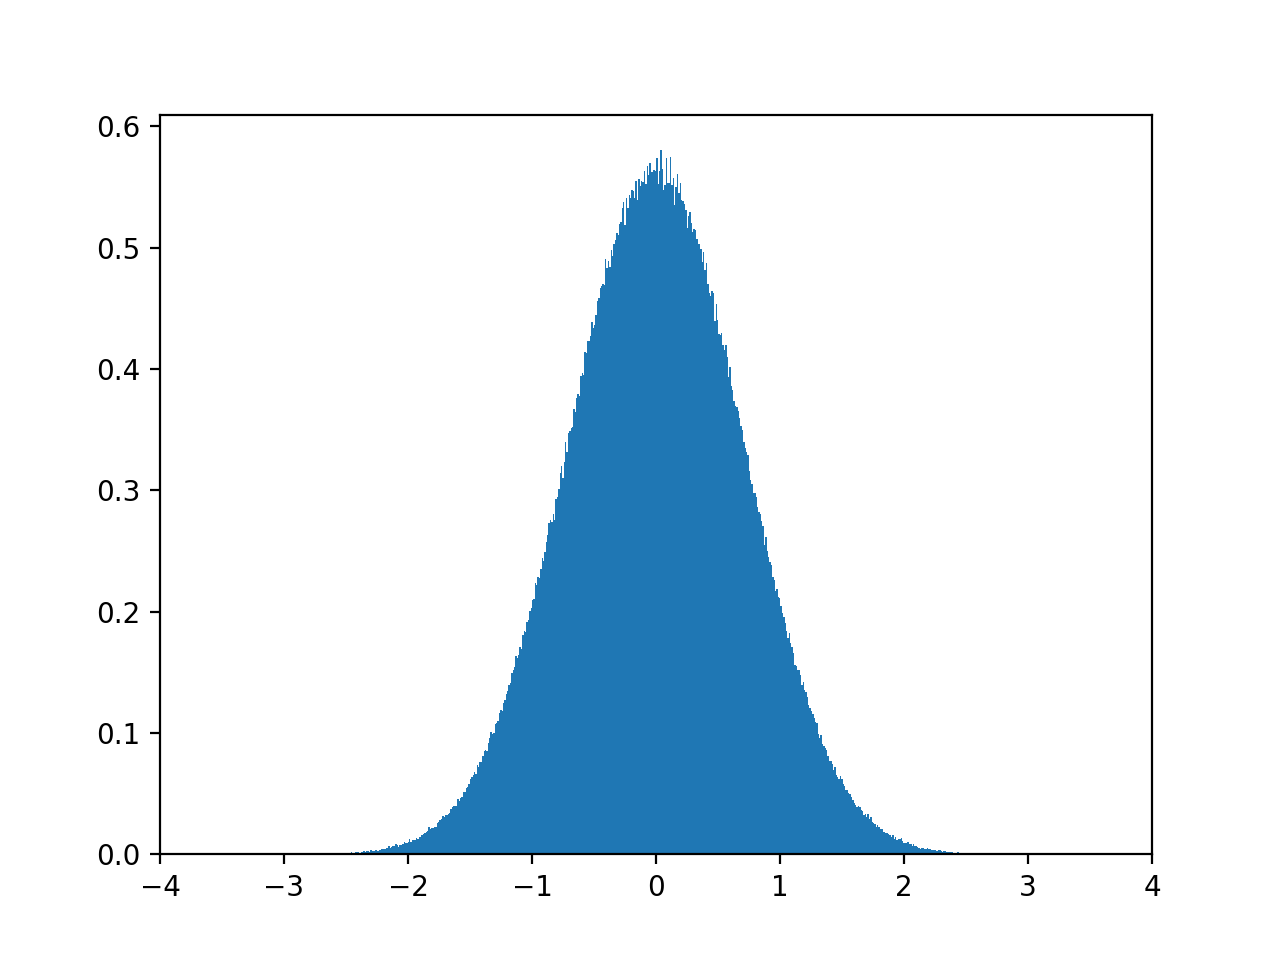

In [11]:
width = 5    # sampling width parameter
xList = [10]    # some random starting point

numberOfSamples = 5000000
xAccumulator = 0.0   # accuumlate for mean and standard deviation of accepted points
x2accumulator = 0.0
rejected  = 0.0  # count rejects 

np.random.seed(247)

for i in range(numberOfSamples):

    x = xList[-1]
    
    xTrial = x + width * (np.random.random() - 0.5)
    w = gaussian(xTrial) / gaussian(x)
    
    if w >= 1.0: # accept move
        xList.append(xTrial)
            
    else :
        r = np.random.random()
        
        if r <= w: # again accept move
            xList.append(xTrial)
                
        else : # reject move
            xList.append(x)   # keep current point for statistics
            rejected+=1
    
    xAccumulator += xList[-1]
    x2accumulator += xList[-1]**2
            
print("Accepted fraction: {:0.4f}".format((numberOfSamples-rejected)/numberOfSamples))
print("<x> = ", xAccumulator / numberOfSamples)
print("<x^2> = ", x2accumulator / numberOfSamples)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(xList, bins='auto', density=1)
ax.set_xlim([-4,4])
fig.show()